# <center>Medical Insurance Cost Prediction & Analysis</center>

<img src="https://www.ecogujju.com/wp-content/uploads/2023/12/health-insurance-market-analysis.jpg" 
     width="500" 
     height="500" />

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
df.shape

(1338, 7)

In [17]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='charges', ylabel='Density'>

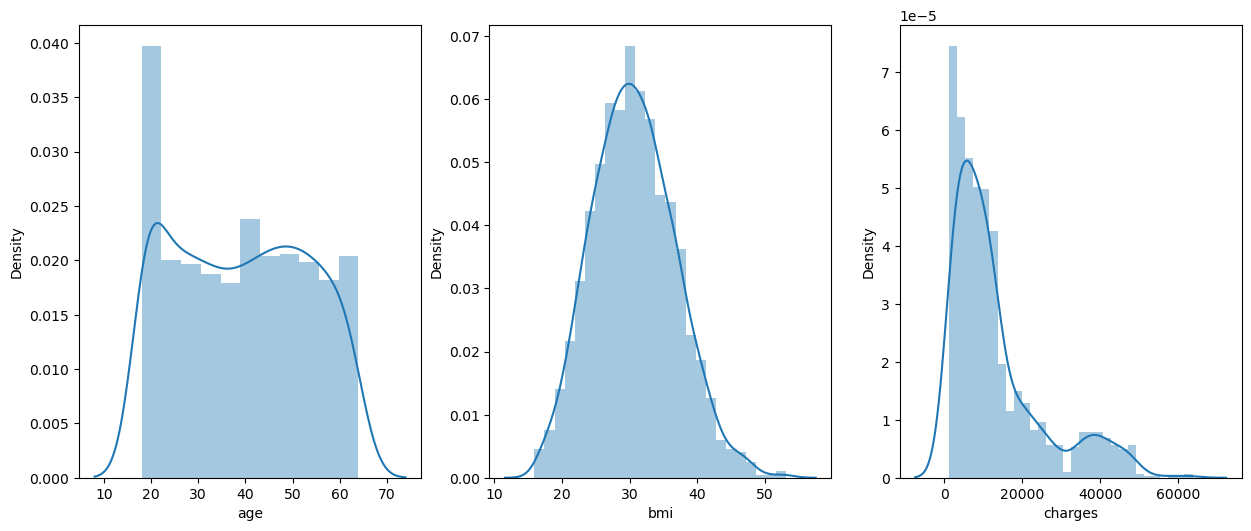

In [22]:
# creating histograms
plt.figure(figsize = (15,20))
plt.subplot(3,3,1)
sns.distplot(df['age'])

plt.subplot(3,3,2)
sns.distplot(df['bmi'])

plt.subplot(3,3,3)
sns.distplot(df['charges'])

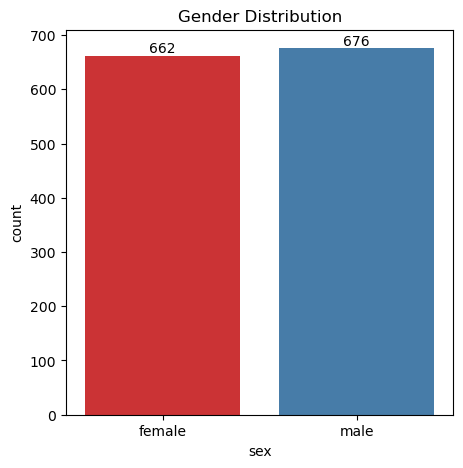

In [34]:
# Gender column
plt.figure(figsize=(5,5))
ax = sns.countplot(df, x = 'sex', palette = 'Set1')
plt.title('Gender Distribution')

for bars in ax.containers:
    ax.bar_label(bars)

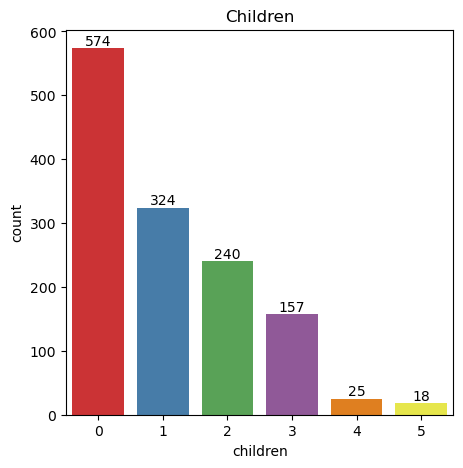

In [33]:
# Gender column
plt.figure(figsize=(5,5))
ax = sns.countplot(df, x = 'children', palette = 'Set1')
plt.title('Children')

for bars in ax.containers:
    ax.bar_label(bars)

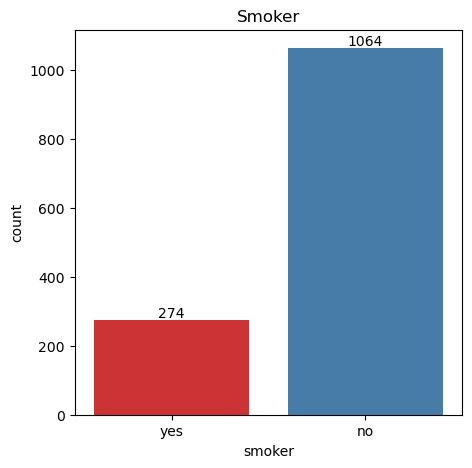

In [32]:
# Gender column
plt.figure(figsize=(5,5))
ax = sns.countplot(df, x = 'smoker', palette = 'Set1')
plt.title('Smoker')

for bars in ax.containers:
    ax.bar_label(bars)

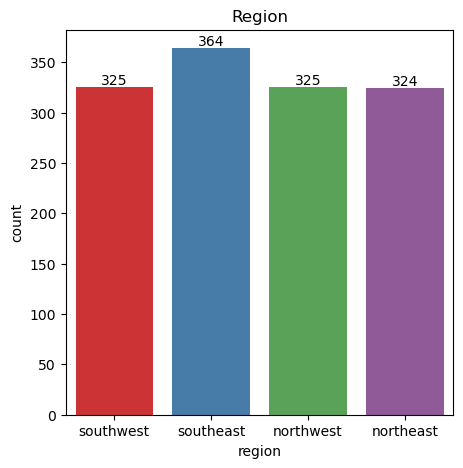

In [31]:
# Gender column
plt.figure(figsize=(5,5))
ax = sns.countplot(df, x = 'region', palette = 'Set1')
plt.title('Region')

for bars in ax.containers:
    ax.bar_label(bars)

## Finding Corelation using Heatmap

<Axes: >

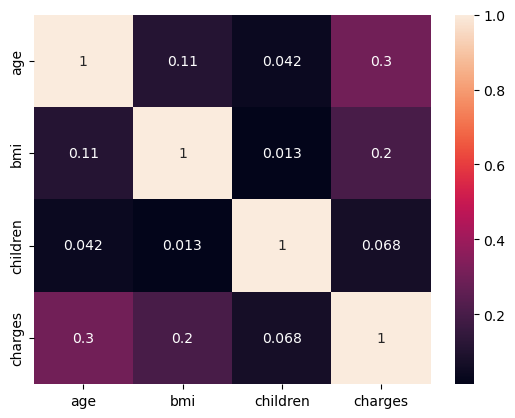

In [36]:
corr = df.corr()
# plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

## Label Encoding

In [37]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

#encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [39]:
#splitting the Features and Target
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [40]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [41]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Train and Test Data Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Train Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()

In [51]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [52]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [58]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [54]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [55]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


## Building a Predictive System

In [56]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960514
